# R054 - Archisha Sinha
## Domain: Reinforcement Learning
## Topic: Temporal Difference


## **Temporal Difference**
- Temporal Difference (TD) Learning is a key technique in RL that updates the value of states based on rewards and estimated future values of subsequent states.
- There are two important types:
1. TD(0): A one-step prediction method where the value update is done based on the immediate reward and the value of the next state.
2. TD(1): Also known as Monte Carlo with discounting, this method updates the value of each state based on the full return (cumulative discounted reward) for the entire episode.


### TD(0) rule

{D7874408-2312-4FE2-91D1-0D3F7A4AD556}.png

### TD(1) Rule

{C6C43BF0-37A0-4CC8-AEAA-068240C48295}.png

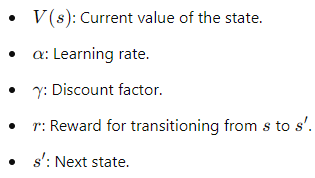

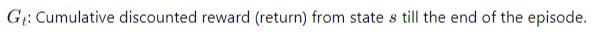

## Problem Description
Consider a 5x5 grid world where a robot must navigate from a start state to a goal state while avoiding obstacles. The robot receives positive rewards for reaching the goal, negative rewards for hitting obstacles, and small penalties for each step to encourage efficiency.

### Grid World Setup:
1. The grid has 25 states represented as S={S0,S1,...,S24}
2. The robot can move up, down, left, or right, but if it tries to move outside the grid boundaries, it remains in the same state.
3. The robot receives the following rewards:
- +10 for reaching the goal state GGG.
- -10 for hitting an obstacle.
- -1 for each step to discourage long paths.
4. The goal state is S24, and the start state is S0​. Obstacles are placed in several states, and the robot must learn to avoid them.


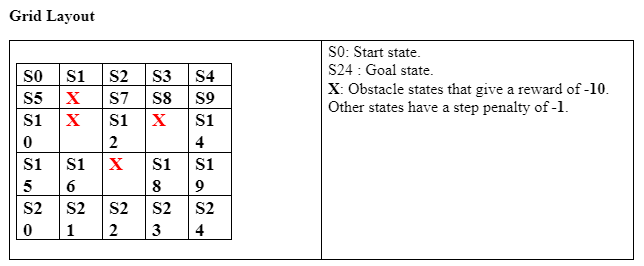

## Task to be completed:
- Take hyper parameters as α=0.1 and γ=0.9. Consider initial values of all states as 0
- Run multiple episodes (till convergence) to obtain value using TD(0)
- Run multiple episodes (till convergence) to obtain value using TD(1)
- Compare both the algorithms on the basis of accuracy and time taken to converge


In [1]:
import numpy as np
import random

In [2]:
# Grid world size and parameters
n_rows, n_cols = 5, 5
n_states = n_rows * n_cols
alpha = 0.1  # learning rate
gamma = 0.9  # discount factor

In [3]:
# Reward and transition setup
rewards = np.full(n_states, -1.0)  # step penalty
rewards[24] = 10  # goal reward
obstacles = [6, 7, 8, 16]  # obstacle states
for obs in obstacles:
    rewards[obs] = -10

In [4]:
# Initialize value function
V_td0 = np.zeros(n_states)  # for TD(0)
V_td1 = np.zeros(n_states)  # for TD(1)

In [5]:
# Define actions: up, down, left, right
actions = {"up": -n_cols, "down": n_cols, "left": -1, "right": 1}

In [6]:
# State transition function
def next_state(s, action):
    # Moving out of bounds or hitting boundaries stays in the same state
    if action == "up" and s < n_cols:  # Top row
        return s
    if action == "down" and s >= n_states - n_cols:  # Bottom row
        return s
    if action == "left" and s % n_cols == 0:  # Left column
        return s
    if action == "right" and (s + 1) % n_cols == 0:  # Right column
        return s

    # Move to the next state
    return s + actions[action]

In [7]:
# Function to run TD(0)
def td0(episodes):
    global V_td0
    for _ in range(episodes):
        state = 0  # start state
        while state != 24:  # until goal is reached
            action = random.choice(list(actions.keys()))  # choose random action
            new_state = next_state(state, action)
            reward = rewards[new_state]
            # TD(0) update
            V_td0[state] += alpha * (reward + gamma * V_td0[new_state] - V_td0[state])
            state = new_state

In [8]:
# Function to run TD(1)
def td1(episodes):
    global V_td1
    for _ in range(episodes):
        state = 0  # start state
        trajectory = []
        while state != 24:  # until goal is reached
            action = random.choice(list(actions.keys()))  # choose random action
            new_state = next_state(state, action)
            reward = rewards[new_state]
            trajectory.append((state, reward))
            state = new_state

        # Update the values using the entire episode (full returns)
        G = 0
        for t in range(len(trajectory)-1, -1, -1):
            state, reward = trajectory[t]
            G = reward + gamma * G  # cumulative reward
            V_td1[state] += alpha * (G - V_td1[state])

In [9]:
# Run TD(0) and TD(1)
episodes = 1000
td0(episodes)
td1(episodes)

In [10]:
# Compare the values obtained from TD(0) and TD(1)
print("Value Function from TD(0):")
print(V_td0.reshape(n_rows, n_cols))

print("\nValue Function from TD(1):")
print(V_td1.reshape(n_rows, n_cols))

Value Function from TD(0):
[[-23.91793464 -28.62192491 -30.50130507 -28.62157092 -22.29053379]
 [-27.6184566  -31.53489128 -32.0142174  -26.20520179 -22.07785828]
 [-23.2732314  -26.83491233 -25.838728   -22.88695486 -15.56509164]
 [-23.26850215 -22.39411814 -17.0065789  -11.62213397  -2.13222791]
 [-20.78406656 -24.25955338 -17.32184347  -7.74817273   0.        ]]

Value Function from TD(1):
[[-26.2600107  -24.09194173 -22.03724605 -26.31981605 -28.01136243]
 [-25.40904495 -25.51863978 -23.68598905 -26.08258448 -25.05233822]
 [-22.30124009 -24.80238319 -24.17290931 -24.12711066 -14.30438047]
 [-18.33729541 -21.07062178 -20.45978912 -14.71842474 -10.21072163]
 [-14.71925234 -13.26984838 -14.81465329  -7.34450131   0.        ]]


In [11]:
import time
from sklearn.metrics import mean_squared_error

In [12]:
# Measure time taken for TD(0)
start_time_td0 = time.time()
td0(episodes)
end_time_td0 = time.time()
time_taken_td0 = end_time_td0 - start_time_td0

In [13]:
# Measure time taken for TD(1)
start_time_td1 = time.time()
td1(episodes)
end_time_td1 = time.time()
time_taken_td1 = end_time_td1 - start_time_td1

In [14]:
# Compare both TD(0) and TD(1) using Mean Squared Error (MSE)
mse_td0 = mean_squared_error(V_td0, V_td1)  # TD(0) vs TD(1)

# Display results
print(f"Time taken for TD(0): {time_taken_td0:.4f} seconds")
print(f"Time taken for TD(1): {time_taken_td1:.4f} seconds")
print(f"Mean Squared Error between TD(0) and TD(1): {mse_td0:.4f}")

Time taken for TD(0): 0.3255 seconds
Time taken for TD(1): 0.4980 seconds
Mean Squared Error between TD(0) and TD(1): 19.0320
